# Analyze ideal gas thermodynamics.
The goal of this notebook is to allow the user to study ideal gas thermodynamics with a number of compositions.  Use the default data or upload other files.  If your current version of the notebook gets corrupted, don't worry. Simply quit and download a new copy from GitHub, or start up a new version on Google Colab.

Begin by installing and importing the necessary python libraries

In [1]:
import sys

!{sys.executable} -m pip install --quiet numpy
!{sys.executable} -m pip install --quiet h5py
!{sys.executable} -m pip install --quiet matplotlib

import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as colors

Retrieve the JINA Reaclib nuclear data from [OSF](https://osf.io/2c4ua/) or use an uploaded file.

In [2]:
!curl -o thermo.h5 -J -L https://osf.io/2c4ua/download

h5 = h5py.File('thermo.h5')
#h5 = h5py.File('example.h5')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0    449      0  0:00:01  0:00:01 --:--:--   456
100 5203k  100 5203k    0     0  1386k      0  0:00:03  0:00:03 --:--:-- 2275k


Now choose a composition.  Possible 

In [3]:
for key in list(h5.keys()):
    if key != 'T9 and rho':
        print(key)

C+O
H
He


Choose a composition.

In [4]:
comp = 'C+O'

Now list the possible properties.

In [5]:
f = h5[comp]
for key in list(f.keys()):
    print(key)

baryon cv
baryon entropy per nucleon
baryon pressure
electron chemical potential in kT
electron cv
electron entropy per nucleon
electron pressure
photon cv
photon entropy per nucleon
photon pressure
total cv
total entropy per nucleon
total pressure


Choose the properties to plot.

In [6]:
s = ['baryon pressure', 'electron pressure', 'photon pressure', 'total pressure']

tq = {}
for sq in s:
    tq[sq] = f[sq]

Get T9 and rho.

In [7]:
t9 = h5['T9 and rho/T9'][:]
T = t9*1.e9
rho = h5['T9 and rho/rho'][:]

Choose the fixed rho index and plot the data vs. T9.

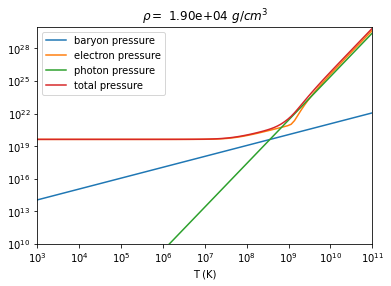

In [8]:
rho_index = 98

assert(rho_index < len(rho))

for i in range(len(s)):
    plt.plot(T, tq[s[i]][:,rho_index], label = s[i])
    
plt.xscale('log')
plt.yscale('log')

plt.xlim([1000, 1.e11])

plt.xticks(np.logspace(np.log10(1000), np.log10(1.e11), 9))

plt.xlabel('T (K)')

plt.ylim([1.e10, 1.e30])

plt.title('$\\rho = $ {:.2e} $g/cm^3$'.format(rho[rho_index]))

plt.legend()

Repeat but plot vs. rho for given T9.

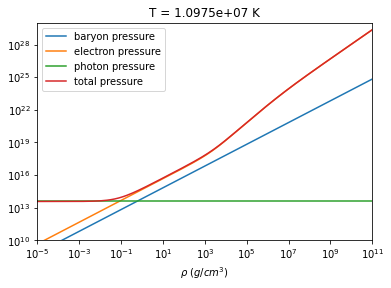

In [9]:
T_index = 50

assert(T_index < len(T))

for i in range(len(s)):
    plt.plot(rho, tq[s[i]][T_index, :], label = s[i])
    
plt.xscale('log')
plt.yscale('log')

plt.xlim([1.e-5, 1.e11])

plt.xlabel('$\\rho\ (g/cm^3)$')

plt.ylim([1.e10, 1.e30])

plt.title('T = {:g} K'.format(T[T_index]))

plt.legend()

Now choose a single quantity to plot against T and rho.

In [10]:
single_property = 'total pressure'

Plot the quantity as a contour plot with chosen levels spaced logarithmically (default) or linearly (commented out).

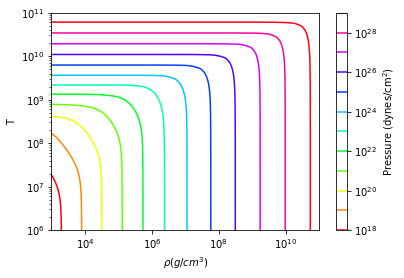

In [13]:
levels = np.logspace(18, 29, 12)
#levels = np.linspace(0, 1.e27, 10)

p = f[single_property]

plt.contour(rho,T,p, levels, norm=colors.LogNorm(vmin=levels[0],vmax=levels[11]),            cmap='hsv')

plt.ylim([1.e6,1.e11])
plt.xlim([1.e3,1.e11])

plt.xscale('log')
plt.yscale('log')

plt.xlabel('$\\rho (g/cm^3)$')
plt.ylabel('T')

plt.colorbar(label = 'Pressure (dynes/cm$^2$)')